# Preprocessing


In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('dog_adoption2')
df.shape

(16008, 58)

In [20]:
df['outcome_type'].unique()


array(['Adoption'], dtype=object)

In [21]:
df.head()

,Unnamed: 0,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,intake_condition,intake_type,sex_upon_outcome,...,color_Brown,color_Brown Brindle,color_Buff,color_Gray,color_Red,color_Sable,color_Tan,color_Tricolor,color_White,color_Yellow
0,12,Adoption,A200922,16.0,2013-11-22 09:44:00,2013-11,Dog,Normal,Owner Surrender,Neutered Male,...,0,0,0,0,0,0,0,0,0,0
1,14,Adoption,A210457,17.0,2016-10-07 12:34:00,2016-10,Dog,Aged,Public Assist,Neutered Male,...,0,0,0,0,0,0,1,0,0,0
2,22,Adoption,A226069,15.0,2015-10-29 15:00:00,2015-10,Dog,Normal,Stray,Neutered Male,...,0,0,0,0,0,1,0,0,0,0
3,32,Adoption,A249087,15.0,2016-11-15 10:37:00,2016-11,Dog,Normal,Stray,Spayed Female,...,0,0,0,0,0,0,0,0,0,0
4,48,Adoption,A274546,11.0,2013-11-16 12:24:00,2013-11,Dog,Normal,Stray,Spayed Female,...,0,0,0,0,0,0,0,1,0,0


In [22]:
#intake condition and type might add a little noise since it's not equally distributed 
print(df['intake_condition'].value_counts())
print(df['intake_type'].value_counts())

Normal      15089
Injured       457
Nursing       194
Sick          183
Aged           44
Other          27
Pregnant       12
Feral           2
Name: intake_condition, dtype: int64
Stray                 11745
Owner Surrender        3942
Public Assist           317
Euthanasia Request        4
Name: intake_type, dtype: int64


In [23]:
#creating dummy variables for the remaining categorical variables
df = pd.get_dummies(df, columns=['intake_condition', 'intake_type', 'sex_upon_outcome'], prefix=['intake_cond', 'intake_type', 'gender'])


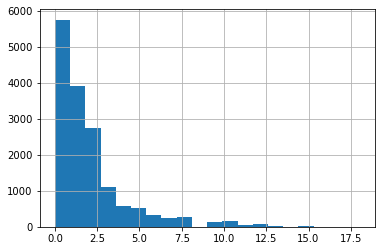

In [28]:

df['age_upon_outcome_(years)'].hist(bins=20)


In [29]:
df['age_upon_outcome_(years)'].unique()

array([16. , 17. , 15. , 11. , 12. , 13. ,  9. , 10. ,  7. ,  8. , 14. ,
        6. ,  5. ,  4. ,  3. ,  2. ,  1. ,  0.8,  0.9,  0.5,  0.7,  0.4,
        0.6,  0.2,  0.3,  0.1,  0. , 18. ])

In [30]:
#changing time_in_shelter_days to int
df['time_in_shelter_days'] = df['time_in_shelter_days'].astype(int)

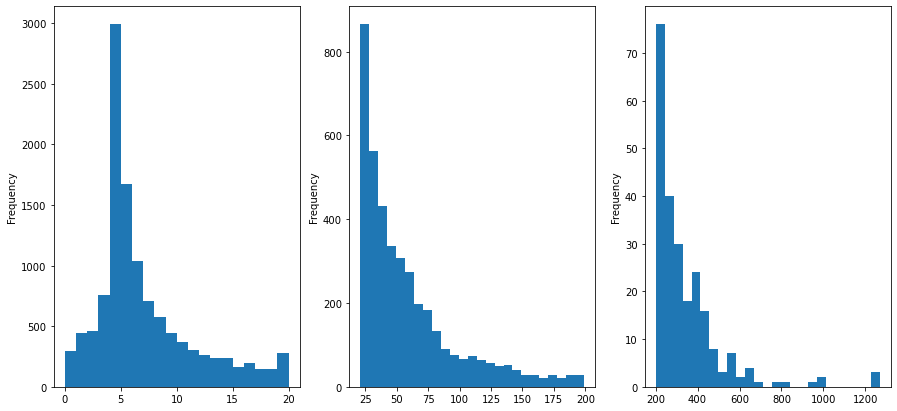

In [31]:
# histograms of time in shleter
time_most = df[df.loc[:,'time_in_shelter_days'] >=200 ]
time20 = df[df.loc[:,'time_in_shelter_days']<= 20 ]
time_mid = df[(df.loc[:, 'time_in_shelter_days']> 20) & (df.loc[:, 'time_in_shelter_days']<200)]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (15,7))
time20['time_in_shelter_days'].plot(ax=axes[0], kind='hist', bins=20)
time_mid['time_in_shelter_days'].plot(ax=axes[1], kind='hist', bins=25)
time_most['time_in_shelter_days'].plot(ax=axes[2], kind='hist', bins=25)


In [32]:
#most dogs spend less than a week in the shelter
print('Percentiles of time in shelter. \n 10th:{}, 50th: {}, 90th: {}'.format(df['time_in_shelter_days'].quantile(q=.10),
        df['time_in_shelter_days'].quantile(q=.50), df['time_in_shelter_days'].quantile(q=.90)))

Percentiles of time in shelter. 
 10th:3.0, 50th: 7.0, 90th: 61.0


In [37]:
#creating bins based on quantiles
labels = ['< 4 days', '4-7 days', '7-23 days', '23+ days']
df['time_in_shelter_binned'] = pd.qcut(df['time_in_shelter_days'], 4, labels=labels)

In [38]:
df['time_in_shelter_binned'].value_counts().sort_values()

4-7 days     3419
7-23 days    3726
23+ days     3912
< 4 days     4951
Name: time_in_shelter_binned, dtype: int64

In [39]:
#convert binned time in shelter to int (0-3) for modeling purposes
def create_dict(items): #creates dict {bin:num}
        return {v: i for i, v in enumerate(items, 0)}
time_binned_int = df['time_in_shelter_binned'].unique().tolist()
time = create_dict(time_binned_int)
df['time_binned_int']=df['time_in_shelter_binned'].map(create_dict(time))
df.head()

,Unnamed: 0,outcome_type,animal_id_intake,age_upon_outcome_(years),outcome_datetime,outcome_monthyear,animal_type,age_upon_intake_(years),intake_datetime,intake_monthyear,...,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,gender_Intact Female,gender_Intact Male,gender_Neutered Male,gender_Spayed Female,time_in_shelter_binned,time_binned_int
0,12,Adoption,A200922,16.0,2013-11-22 09:44:00,2013-11,Dog,16.0,2013-10-03 15:47:00,2013-10,...,0,1,0,0,0,0,1,0,23+ days,0
1,14,Adoption,A210457,17.0,2016-10-07 12:34:00,2016-10,Dog,17.0,2016-09-28 12:05:00,2016-09,...,0,0,1,0,0,0,1,0,7-23 days,1
2,22,Adoption,A226069,15.0,2015-10-29 15:00:00,2015-10,Dog,15.0,2015-10-06 12:29:00,2015-10,...,0,0,0,1,0,0,1,0,7-23 days,1
3,32,Adoption,A249087,15.0,2016-11-15 10:37:00,2016-11,Dog,15.0,2016-08-17 14:05:00,2016-08,...,0,0,0,1,0,0,0,1,23+ days,0
4,48,Adoption,A274546,11.0,2013-11-16 12:24:00,2013-11,Dog,11.0,2013-11-13 18:16:00,2013-11,...,0,0,0,1,0,0,0,1,< 4 days,2


In [40]:
#columns to be used as x, y will only be time_in_shelter_binned
l = list(df.columns)
c = df.columns[df.columns.str.startswith(('breed', 'color', 'gender', 'intake_type_', 'intake_cond_'))].to_list()
columns=['age_upon_outcome_(years)']+ c 
columns
x_df = df[columns]

In [41]:
x = x_df
y = df[['time_in_shelter_binned']]
x.head()

,age_upon_outcome_(years),intake_cond_int,intake_type_int,breed_Anatol Shepherd,breed_Australian Cattle Dog,breed_Australian Kelpie,breed_Australian Shepherd,breed_Beagle,breed_Black Mouth Cur,breed_Border Collie,...,intake_cond_Pregnant,intake_cond_Sick,intake_type_Euthanasia Request,intake_type_Owner Surrender,intake_type_Public Assist,intake_type_Stray,gender_Intact Female,gender_Intact Male,gender_Neutered Male,gender_Spayed Female
0,16.0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,17.0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,15.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,15.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,11.0,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


Split into train and test data

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size =.3, random_state=1)

# Modeling
 KNN and Random Forest

In [60]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
from sklearn.metrics import confusion_matrix

train_scores = []
test_scores = []

for i in range(20, 30): #0-20 had lower accuracy 
    knn = KNeighborsClassifier(i)
    knn.fit(x_train, y_train)
    
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test, y_test))

In [53]:
print('train:',[round(x, 4) for x in train_scores])
print('test:',[round(x, 4) for x in test_scores])


train: [0.4933, 0.49, 0.488, 0.49, 0.4882, 0.4869, 0.4867, 0.4861, 0.4837, 0.4817]
test: [0.4258, 0.4214, 0.4218, 0.4272, 0.4237, 0.4301, 0.4239, 0.4249, 0.4264, 0.4258]


/home/amanda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/amanda/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


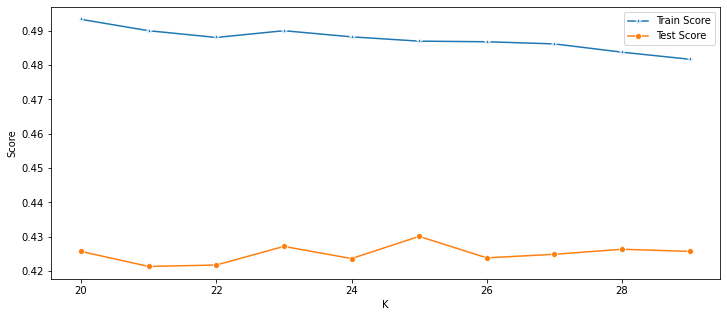

In [59]:
plt.figure(figsize=(12,5))
plt.xlabel('K')
plt.ylabel('Score')
p = sns.lineplot(range(20,30),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(20,30),test_scores,marker='o',label='Test Score')

In [70]:
#Grid search to maybe find better k
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(x_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [71]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.43507362784471215
Best Parameters: {'n_neighbors': 49}


In [62]:
#score with confusion maxtrix
knn= KNeighborsClassifier(n_neighbors=26)
knn.fit(x_train, y_train)
knn.score(x_test, y_test)

y_pred = knn.predict(x_test)
confusion_matrix(y_test, y_pred)

array([[637, 103, 215, 223],
       [167, 237, 207, 438],
       [373, 191, 244, 295],
       [175, 202, 178, 918]])

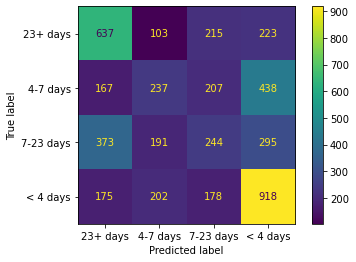

In [64]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, x_test, y_test)

In [46]:
#Random Forest gini
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf = RandomForestClassifier(criterion='gini' ,random_state=1)

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

metrics.accuracy_score(y_test, y_pred)


0.42390172808661253

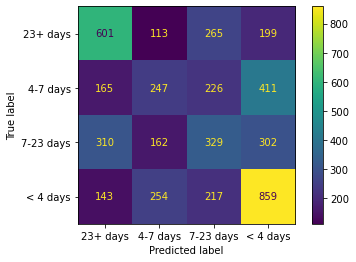

In [66]:
plot_confusion_matrix(clf, x_test, y_test)

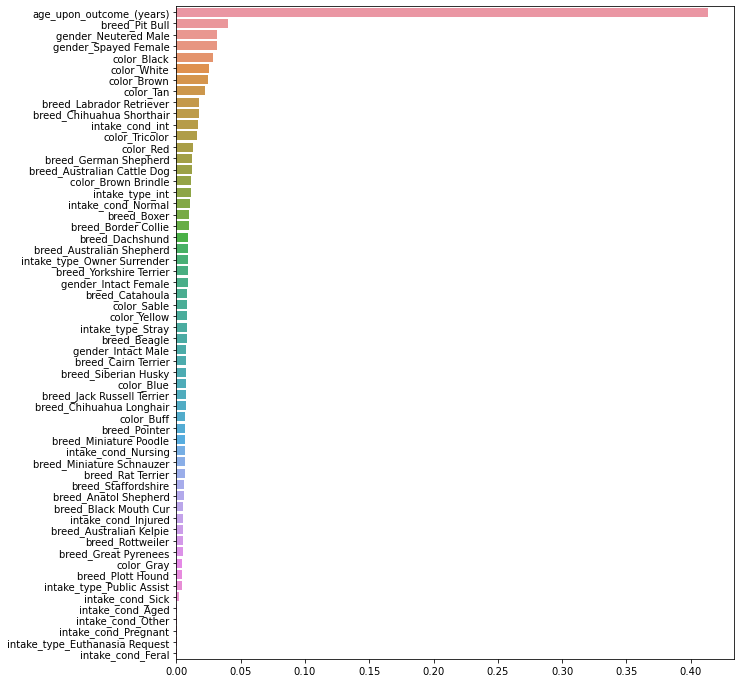

In [47]:
feature_imp = clf.feature_importances_
f = pd.Series(feature_imp,index=x_df.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x=f, y=f.index)

Looks like age is the most important factor, gender is likely so high up because the majority of dogs are spayed femals and neutered males. Intake condition may be adding noise. 

In [48]:
#Random Forest entropy
e_clf = RandomForestClassifier(criterion='entropy', random_state=1)
e_clf = e_clf.fit(x_train, y_train)

y_pred = e_clf.predict(x_test)
metrics.accuracy_score(y_test, y_pred)


0.42452633770560066

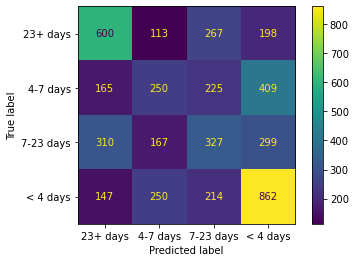

In [67]:
plot_confusion_matrix(e_clf, x_test, y_test)

In [49]:
#rerunning random forest without certain varables 
#creating new train and test sets
#remving color improves the model the most
c = df.columns[df.columns.str.startswith(( 'breed','gender', 'intake_cond_', 'intake_type_'))].to_list()
columns=['age_upon_outcome_(years)']+ c 
columns
x2_df = df[columns]

x2 = x2_df
y2 = df[['time_in_shelter_binned']]


x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size =.3, random_state=42)

In [50]:
e_clf2 = RandomForestClassifier(criterion='gini', random_state=1)
e_clf2 = e_clf2.fit(x2_train, y2_train)

y2_pred = e_clf2.predict(x2_test)
metrics.accuracy_score(y2_test, y2_pred)


0.4428482198625859

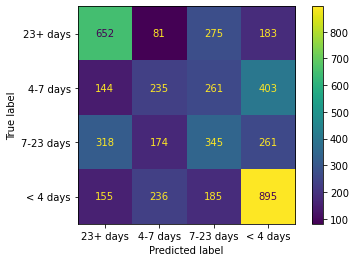

In [69]:
plot_confusion_matrix(e_clf2, x2_test, y2_test)

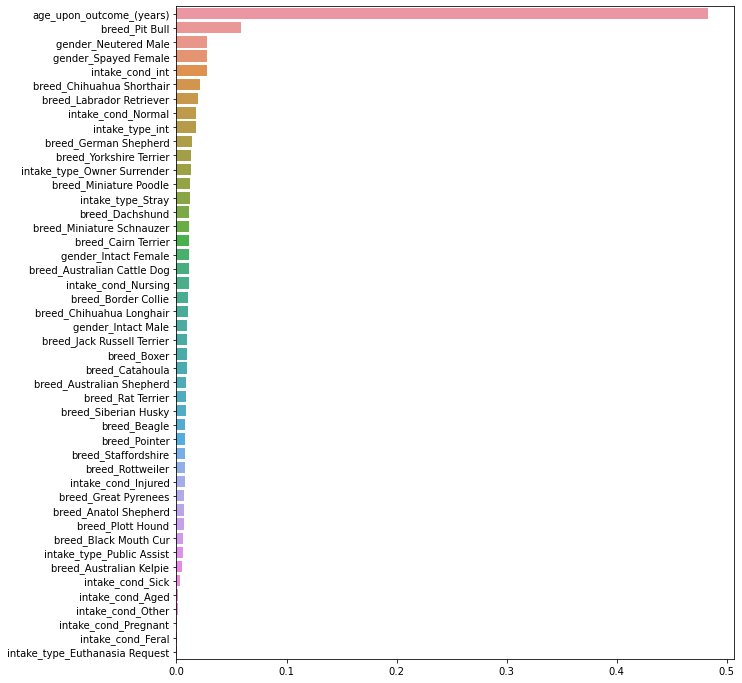

In [51]:
feature_imp = e_clf2.feature_importances_
f2 = pd.Series(feature_imp,index=x2_df.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 12))
sns.barplot(x=f2, y=f2.index)